In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
users = pd.read_csv('takehome_users.csv')
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
users[users.invited_by_user_id.isnull()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
10,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1.350058e+09,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,281,NaN
11994,11995,2013-10-21 13:33:17,Werfel Sebastian,SebastianWerfel@gmail.com,PERSONAL_PROJECTS,1.382449e+09,0,0,0,NaN
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [8]:
users.invited_by_user_id.fillna(0, inplace=True)

In [9]:
users.invited_by_user_id = users.invited_by_user_id.astype('int64')

In [10]:
users.last_session_creation_time = pd.to_datetime(users.last_session_creation_time, unit='s')

In [11]:
nan_filter = users.last_session_creation_time.isnull()
nan_last_session = users[nan_filter]
has_last_session = users[~nan_filter]

In [12]:
nan_last_session.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,0
11,12,2014-04-17 23:48:38,Mathiesen L�rke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,0
15,16,2013-02-11 10:09:50,Engel Ren�,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,0


In [13]:
has_last_session.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240


In [14]:
users.last_session_creation_time.fillna(users.creation_time, inplace=True)

All of the missing data has been imputed and the appropriate data types have been applied to each feature of the users table. from the engagement table we must now find how many users meet the "adopted_user" criteria.

In [15]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)

In [16]:
grouped = engagement.groupby('user_id').sum()

In [17]:
three_logins = grouped.visited >= 3

In [18]:
logins3 = engagement[engagement.user_id.isin(grouped[three_logins].index)]

In [19]:
logins3['date'] = logins3['time_stamp'].dt.date
logins3 = logins3.drop('time_stamp', axis=1)

C:\Users\StepRoma\AppData\Local\Temp\ipykernel_14384\3716079011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logins3['date'] = logins3['time_stamp'].dt.date


In [20]:
def logins_in_past_7_days(df):
    df = df.drop_duplicates(subset='date')
    days_since_login = df['date'].diff(periods=2)
    return any(days_since_login <= dt.timedelta(days=7))

In [21]:
adopted_users = logins3.groupby('user_id').apply(logins_in_past_7_days)


In [22]:
adopted_users

user_id
2         True
10        True
20        True
33        True
42        True
         ...  
11975     True
11980    False
11981    False
11988     True
11991    False
Length: 2248, dtype: bool

In [23]:
logins3['adopted'] = adopted_users

In [24]:
retained_user = logins3[logins3['adopted'] == True].index

In [25]:
users['adopted'] = users.object_id.isin(retained_user)

In [26]:
users.adopted = users.adopted.astype('int')

In [27]:
users.creation_time = pd.to_datetime(users.creation_time)

In [28]:
users['membership_length'] = users.last_session_creation_time-\
    users.creation_time

In [29]:
users['membership_length'] = users['membership_length'].astype('str').str.replace(' days', '')

In [30]:
users['membership_length'] = users['membership_length'].astype('int')

In [31]:
users_eda = users.drop(['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time'], axis=1)


In [32]:
adopted_filter = users_eda.adopted == 1

In [33]:
adopted_data = users_eda[adopted_filter]

In [34]:
users_eda[adopted_filter]

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,membership_length
1,ORG_INVITE,0,0,1,316,1,136
9,ORG_INVITE,1,1,318,4143,1,503
19,SIGNUP,0,0,58,0,1,84
32,GUEST_INVITE,0,0,401,79,1,81
41,SIGNUP,1,0,235,0,1,560
...,...,...,...,...,...,...,...
11964,GUEST_INVITE,0,0,65,11251,1,26
11966,GUEST_INVITE,0,0,15,5688,1,139
11968,GUEST_INVITE,1,1,52,6647,1,363
11974,GUEST_INVITE,1,0,31,6410,1,425


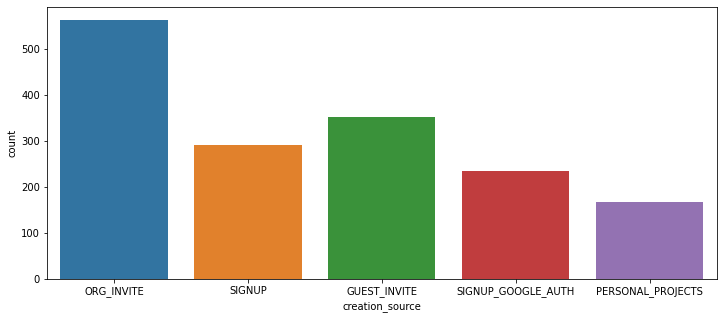

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(data=users_eda[adopted_filter], x='creation_source')
plt.show()

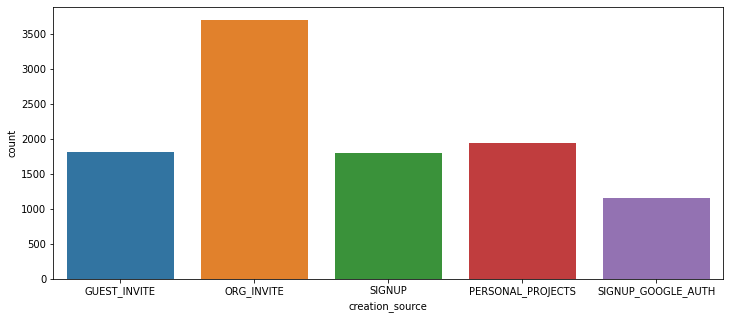

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(data=users_eda[~adopted_filter], x='creation_source')
plt.show()

This would suggest that most people that end up adopted the platform do so for work. Most of the adopted users signed up through an organization, however a large portion of those that dont adopt also join because of an organizational signup. So sign up method may not be the best indicator of adoption rate.

<AxesSubplot:xlabel='membership_length', ylabel='Count'>

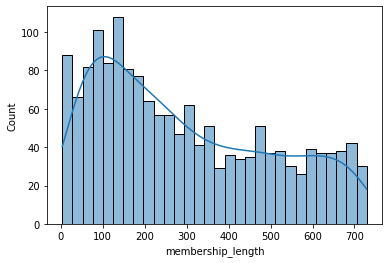

In [37]:
sns.histplot(data=users_eda[adopted_filter], x='membership_length', bins=30, kde=True)

<AxesSubplot:xlabel='membership_length', ylabel='Count'>

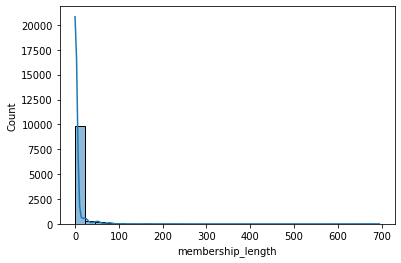

In [38]:
sns.histplot(data=users_eda[~adopted_filter], x='membership_length', bins=30, kde=True)

In [39]:
print('Unadopted', \
    'mean: ' + str(users_eda[~adopted_filter].membership_length.mean()),\
    'median: ' + str(users_eda[~adopted_filter].membership_length.median()), \
    'min: ' + str(users_eda[~adopted_filter].membership_length.min()), \
    'max: ' + str(users_eda[~adopted_filter].membership_length.max()), sep='\n')

Unadopted
mean: 4.946993746993747
median: 0.0
min: 0
max: 695


In [40]:
print('Adopted', \
    'mean: ' + str(users_eda[adopted_filter].membership_length.mean()),\
    'median: ' + str(users_eda[adopted_filter].membership_length.median()), \
    'min: ' + str(users_eda[adopted_filter].membership_length.min()), \
    'max: ' + str(users_eda[adopted_filter].membership_length.max()), sep='\n')

Adopted
mean: 293.51588785046727
median: 244.0
min: 4
max: 729


On average adopted users have spent significantly more time on the platform than have those that do not adopt. In fact, most people that do not adopt signup and then never use the platform. This makes sense given that at leasdt 3 sign-in within a 7 day span constitutes an adopted user. So a primary focus should be on getting user to user the platform early and often in their membership.

In [48]:
users_eda.groupby('opted_in_to_mailing_list')['adopted'].apply(lambda x: sum(x)/len(x))

opted_in_to_mailing_list
0    0.132023
1    0.138945
Name: adopted, dtype: float64

In [49]:
users_eda.groupby('enabled_for_marketing_drip')['adopted'].apply(lambda x: sum(x)/len(x))

enabled_for_marketing_drip
0    0.133033
1    0.137835
Name: adopted, dtype: float64

Neither the marketing drip nor the mailist categories show a significant difference between classes. So the most important features identified from this short EDA appear to be the account creation source and the membership length (difference between initial signup and last use).